In [524]:
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import pandas as pd
import numpy as np
import json
from sklearn import linear_model, datasets

In [525]:
# 1
titanic_data_df = pd.read_excel("~/Desktop/Aderus_Project/titanic_data.xlsx")
titanic_data_df.head()

titanic_data_copy = titanic_data_df

#removes empty row if a value is null
titanic_data_df = titanic_data_df.dropna()

In [526]:
#2 Describe
titanic_data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [527]:
# 3
# Question?
# What is the ratio of children to adults
# Childen <= 12
# Adults >=

In [528]:
# 4 - Clean Data

gender_binary = pd.Series(np.where(titanic_data_df.Sex.values == 'female', 1, 0), titanic_data_df.index)

In [529]:
titanic_data_df["Gender"] = gender_binary

<ipython-input-529-2b6d2be74a9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data_df["Gender"] = gender_binary


In [530]:
titanic_data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,0.480874
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,0.501005
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000


In [531]:
subset_titanic = titanic_data_df

In [532]:
display(subset_titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,1
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S,0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S,0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.7292,D33,C,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C,0


In [533]:
subset_titanic = subset_titanic.drop(columns = ["Name", "Sex", "Ticket", "Cabin", "Embarked"])

In [534]:
display(subset_titanic)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
1,2,1,1,38.00,1,0,71.2833,1
3,4,1,1,35.00,1,0,53.1000,1
6,7,0,1,54.00,0,0,51.8625,0
10,11,1,3,4.00,1,1,16.7000,1
11,12,1,1,58.00,0,0,26.5500,1
21,22,1,2,34.00,0,0,13.0000,0
23,24,1,1,28.00,0,0,35.5000,0
27,28,0,1,19.00,3,2,263.0000,0
52,53,1,1,49.00,1,0,76.7292,1
54,55,0,1,65.00,0,1,61.9792,0


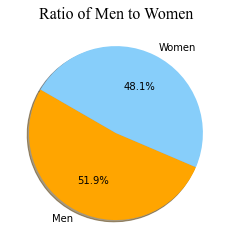

In [535]:
# Create a pie chart for men to women

# Create slices

count_gender = subset_titanic["Gender"].value_counts()

men_slice = count_gender[0]

woman_slice = count_gender[1]

gender_slice = [men_slice, woman_slice]

gender_names = ["Men", "Women"]

cols = ['orange', 'lightskyblue']

plt.pie(gender_slice, labels=gender_names, autopct='%1.1f%%', colors=cols, startangle=150, shadow=True)

plt.title("Ratio of Men to Women", fontdict={'fontname': 'Times New Roman', 'fontsize': 16})

plt.show()

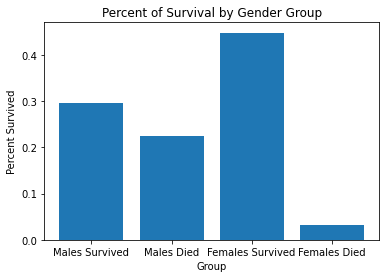

In [536]:
female_survival_df = subset_titanic[subset_titanic["Gender"] == 1]

count_female_survival = female_survival_df["Survived"].value_counts()

male_survival_df = subset_titanic[subset_titanic["Gender"] == 0]

count_male_survival = male_survival_df["Survived"].value_counts()

male_died_slice = count_male_survival[0]
male_survival_slice = count_male_survival[1]


female_died_slice = count_female_survival[0]
female_survival_slice = count_female_survival[1]



group_names = ["Males Survived", "Males Died", "Females Survived", "Females Died"]
count = [male_died_slice/183, male_survival_slice/183, female_survival_slice/183, female_died_slice/183]

plt.bar(group_names, count)
plt.title('Percent of Survival by Gender Group')
plt.xlabel('Group')
plt.ylabel('Percent Survived')
plt.show()

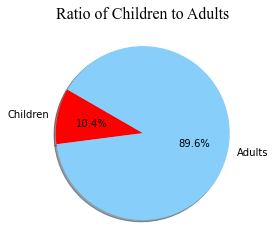

In [537]:
# Create a pie chart for children to adults

# Create slices

child_df = subset_titanic[subset_titanic["Age"] <= 17]

child_slice = sum(child_df["Age"].value_counts())


adult_df = subset_titanic[subset_titanic["Age"] > 17]

adult_slice = sum(adult_df["Age"].value_counts())


age_slice = [child_slice, adult_slice]

age_names = ["Children", "Adults"]

cols = ['red', 'lightskyblue']

plt.pie(age_slice, labels=age_names, autopct='%1.1f%%', colors=cols, startangle=150, shadow=True)

plt.title("Ratio of Children to Adults", fontdict={'fontname': 'Times New Roman', 'fontsize': 16})

plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


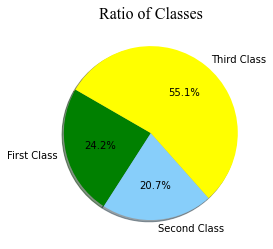

In [538]:
# Create a pie chart for classes 1-3

# Create slices

#Uses Entire Dataset
count_classes = titanic_data_copy["Pclass"].value_counts()

print(count_classes)

first_class = count_classes[1]
second_class = count_classes[2]
third_class = count_classes[3]


class_slice = [first_class, second_class, third_class]

class_names = ["First Class", "Second Class", "Third Class"]

cols = ['green', 'lightskyblue', 'yellow']

plt.pie(class_slice, labels=class_names, autopct='%1.1f%%', colors=cols, startangle=150, shadow=True)

plt.title("Ratio of Classes", fontdict={'fontname': 'Times New Roman', 'fontsize': 16})

plt.show()

In [539]:
display(count_classes)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [540]:
# independent var = fare
# outcome var = survived
 
model_subset = subset_titanic[["Survived", "Fare"]].sort_values(by = ["Fare"])


In [541]:
every10_df = titanic_data_copy[["Survived", "Fare"]].sort_values(by = ["Fare"])

model_every10_index = every10_df.reset_index(drop = True)

In [542]:
display(model_every10_index)

,Survived,Fare
0,1,0.0000
1,0,0.0000
2,0,0.0000
3,0,0.0000
4,0,0.0000
5,0,0.0000
6,0,0.0000
7,0,0.0000
8,0,0.0000
9,0,0.0000


In [543]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [544]:
model_subset_index = model_subset.reset_index(drop = True)

In [545]:
# Function iterates through dataframe and appends the percent of people who survived for every $5

def every5():
    
    dicti = {}
    
    i = 0
    
    lower = 0
    
    upper = 5
        
    survivedCount = 0
    
    perishedCount = 0

    # iterate through the rows tuples of dataframe
    for row in model_every10_index.itertuples():
        
        # set bounds for dictionary 
        if row.Fare >= lower and row.Fare < upper:
        
            if row.Survived == 1:
                survivedCount += 1
                
            elif row.Survived == 0:
                perishedCount += 1

       # when fare is above the range(0-0), add the percentage to the dictionary then set new bounds
        elif (survivedCount + perishedCount) != 0:
                            
            dicti[i] = [(survivedCount/(survivedCount + perishedCount)), (lower), (upper)]
        
            i += 1
            lower += 5
            upper += 5
            survivedCount = 0
            perishedCount = 0
            
        
        
        # change the bounds of the upper and lower if there is gaps in the data (> 5)
        elif row.Fare < lower or row.Fare >= upper:

            
            i += 1
            
            # create lower bound by rounding down the row fare by 5
            skipLower = row.Fare - (row.Fare % 5)
            lower = skipLower
            # create upper bound
            upper = skipLower + 5
            
            # add to counter for the next iteration through the new bounds.. current iterated row only analyzed.
            # passes new bounds and count to first if statement of function
            if row.Survived == 1:
                survivedCount += 1
                
            elif row.Survived == 0:
                perishedCount += 1
            
         
            
    return dicti

In [546]:
# Set the dict returned by every10() to a variable
every_5_dollars_dict = every5()
every_5_dollars_dict

{0: [0.0625, 0, 5],
 1: [0.20689655172413793, 5, 10],
 2: [0.39166666666666666, 10, 15],
 3: [0.5087719298245614, 15, 20],
 4: [0.4146341463414634, 20, 25],
 5: [0.44086021505376344, 25, 30],
 6: [0.425, 30, 35],
 7: [0.45454545454545453, 35, 40],
 8: [0.5, 40, 45],
 9: [0.2222222222222222, 45, 50],
 10: [0.5789473684210527, 50, 55],
 11: [0.8333333333333334, 55, 60],
 12: [0.3333333333333333, 60, 65],
 13: [0.3333333333333333, 65, 70],
 14: [0.2857142857142857, 70, 75],
 15: [0.7, 75, 80],
 16: [0.7777777777777778, 80, 85],
 17: [1.0, 85, 90],
 18: [0.8571428571428571, 90, 95],
 20: [0.3333333333333333, 105.0, 110.0],
 21: [0.6666666666666666, 110.0, 115.0],
 23: [1.0, 120.0, 125.0],
 25: [1.0, 130.0, 135.0],
 26: [0.5, 135.0, 140.0],
 28: [1.0, 145.0, 150.0],
 29: [0.5, 150.0, 155.0],
 31: [1.0, 160.0, 165.0],
 33: [0.6666666666666666, 210.0, 215.0],
 35: [0.75, 225.0, 230.0],
 37: [1.0, 245.0, 250.0],
 39: [0.6, 260.0, 265.0]}

In [547]:
df_rates = pd.DataFrame(list(every_5_dollars_dict.items()), columns = ["Percent", "Bound"])

In [548]:
df = pd.DataFrame(every_5_dollars_dict)

In [549]:
df1_transposed = df.T

Text(0, 0.5, 'Percent Survival')

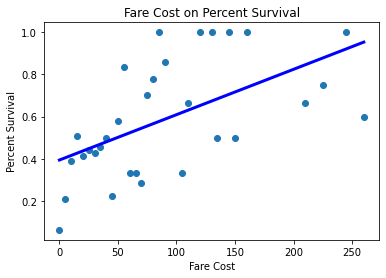

In [550]:
Y = df1_transposed.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

X = df1_transposed.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column


linear_regressor = linear_model.LinearRegression()  # create object for the class

linear_regressor.fit(X, Y)  # perform linear regression


#Create testing set
titanic_y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, titanic_y_pred, color = 'blue', linewidth = 3)
plt.title('Fare Cost on Percent Survival')
plt.xlabel('Fare Cost')
plt.ylabel('Percent Survival')